In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import cv2 as cv
import random

In [3]:
IMG_SIZE = 80
Pet_Dir = '/home/samarth/Documents/Machine_Learning/Data/PetImages'
Categories = ['Dog','Cat']
train_data = []
z = 0
for category in Categories:
    path = os.path.join(Pet_Dir,category)
    for i in os.listdir(path):
        try:
            img = cv.imread(os.path.join(path,i))
            new_image = cv.resize(img,(IMG_SIZE,IMG_SIZE))
            train_data.append([new_image,Categories.index(category)])
        except Exception as e:
            pass

In [5]:
print(train_data[2][0].shape)

(80, 80, 3)


[0 1]


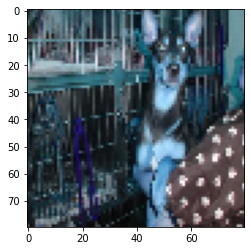

In [4]:
random.shuffle(train_data)
Train_Labels = []
Train_Data = []
test_labels = []
test_data = []
for i in range(len(train_data)):
    if i < 24500:
        Train_Data.append(train_data[i][0])
        Train_Labels.append(train_data[i][1])
    else:
        test_data.append(train_data[i][0])
        test_labels.append(train_data[i][1])
Train_Data = np.array(Train_Data)
test_data = np.array(test_data)
test_labels = np.array(test_labels)
Train_Labels = np.array(Train_Labels)
plt.imshow(Train_Data[535])
print(np.unique(test_labels))

In [5]:
Train_Data = Train_Data / 255.0
test_data = test_data / 255.0
# plt.imshow(Train_Data[535])

In [5]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32,(3,3),input_shape=(80,80,3)))
model.add(keras.layers.MaxPool2D())
model.add(keras.layers.Conv2D(64,(3,3),))
model.add(keras.layers.MaxPool2D())
model.add(keras.layers.Conv2D(84,(3,3),activation='sigmoid'))
model.add(keras.layers.MaxPool2D())
model.add(keras.layers.Conv2D(128,(3,3),activation='sigmoid'))
model.add(keras.layers.MaxPool2D())
model.add(keras.layers.Conv2D(120,(3,3),activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 78, 78, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 39, 39, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 18, 18, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 84)        48468     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 84)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 6, 6, 128)         9

In [7]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64))
model.add(keras.layers.Dense(1,activation='sigmoid'))


In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 78, 78, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 39, 39, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 18, 18, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 84)        48468     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 84)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 6, 6, 128)         9

In [9]:
model.compile(loss=keras.losses.BinaryCrossentropy(),optimizer='adam',metrics=['accuracy'])

In [10]:
print(np.unique(Train_Labels))

[0 1]


In [11]:
model.fit(Train_Data,Train_Labels,epochs=10)


Epoch 1/10
780/780 [==============================] - 77s 98ms/step - loss: 0.6939 - accuracy: 0.4959

In [ ]:
# model.save('many_many')
# loss_,acc = model.evaluate(Train_Data,Train_Labels)
# print(acc)

In [11]:
model_ = keras.models.load_model('many_many')
# l,acc_ = model_.evaluate(test_data,test_labels)
# print(acc_)
img = cv.imread('cat.jpeg')
img = keras.preprocessing.image.img_to_array(img)
new_image = cv.resize(img,(IMG_SIZE,IMG_SIZE))
new_image = new_image / 255.0
label = test_labels[15]
predict = model_.predict(np.array([new_image]))
print(predict)
plt.imshow(new_image)

ValueError: Unsupported image shape: ()